<a href="https://colab.research.google.com/github/WellingtonLandim/wellingtonlandim.github.io/blob/main/Face_Recognition/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics face-recognition opencv-python-headless


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.9/906.9 kB 1.5 MB/s eta 0:00:00
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=878eed261c8683ff2d66f77cce0cd639017d84f3bb45e37f2fdbc9113a4a2885
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import cv2
from ultralytics import YOLO
import face_recognition
import numpy as np
import os
from google.colab.patches import cv2_imshow

In [ ]:

# Carregar o modelo YOLO
model = YOLO('yolov8n.pt')  # Certifique-se de que o modelo está na mesma pasta ou use o caminho correto


100%|██████████| 6.25M/6.25M [00:00<00:00, 132MB/s]


In [56]:
# Configurar pasta de imagens conhecidas
known_faces_dir = 'known_faces'  # Suba as imagens para esta pasta no Colab
os.makedirs(known_faces_dir, exist_ok=True)

In [57]:
# Listas para armazenar codificações de rostos e seus nomes
known_face_encodings = []
known_face_names = []

In [58]:

# Carregar imagens conhecidas
for filename in os.listdir(known_faces_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
        image_path = os.path.join(known_faces_dir, filename)
        image = face_recognition.load_image_file(image_path)
        face_encodings = face_recognition.face_encodings(image)

        # Verificar se há codificações de rostos
        if face_encodings:
            known_face_encodings.append(face_encodings[0])

            # Usar o nome do arquivo como identificação da pessoa
            name = os.path.splitext(filename)[0]
            known_face_names.append(name)

In [66]:
# Selecionar imagem para ser carregada.
uploaded_image_path = '/content/20191102_Chile_00664.jpg'  # Substituir pelo caminho da imagem a ser carregada

In [67]:
# Carregar imagem para reconhecimento
image_to_recognize = face_recognition.load_image_file(uploaded_image_path)
#image_to_recognize = face_recognition.load_image_file(temp_image_path)
rgb_image = cv2.cvtColor(image_to_recognize, cv2.COLOR_BGR2RGB)

In [68]:
# Detectar rostos na imagem
face_locations = face_recognition.face_locations(rgb_image)
face_encodings_to_check = face_recognition.face_encodings(rgb_image, face_locations)

In [69]:
# Error Handling para reconhecimento
if not known_face_encodings:
    raise ValueError("Nenhum rosto foi encontrada na pasta 'known_faces'. "
                     "Certifique-se de que as imagens de referência contenham rostos visíveis.")

# Processar a imagem para reconhecimento
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings_to_check):
    # Verificar correspondências
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Desconhecido"

    # Garantir que existam distâncias antes de calcular o índice do melhor match
    if matches:
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        if len(face_distances) > 0:
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

    # Desenhar o retângulo e o nome na imagem
    cv2.rectangle(rgb_image, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(rgb_image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)



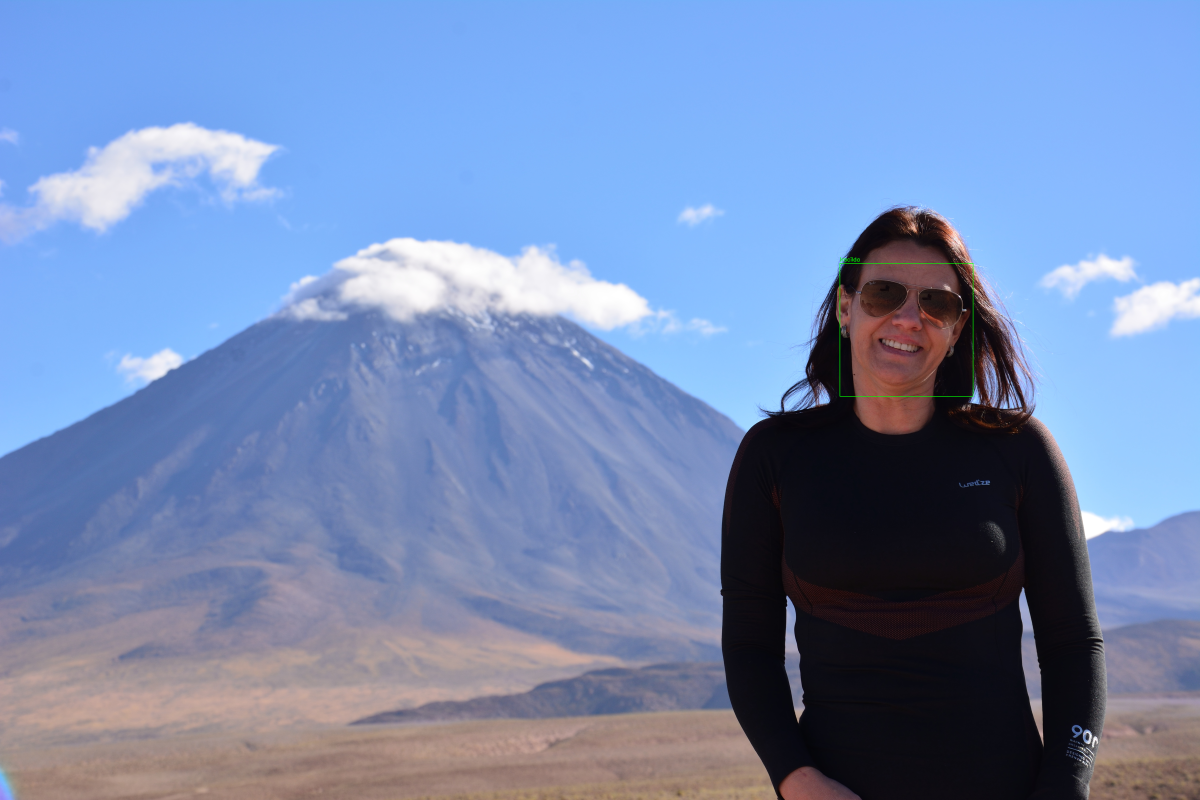

In [70]:
#com a imagem rgb_image já processada, reduz o tamanho para mostrar na tela

# Reduzir o tamanho da imagem para exibição
scale_percent = 20  # Porcentagem do tamanho original
width = int(rgb_image.shape[1] * scale_percent / 100)
height = int(rgb_image.shape[0] * scale_percent / 100)
dim = (width, height)

resized_image = cv2.resize(rgb_image, dim, interpolation=cv2.INTER_AREA)

cv2_imshow(resized_image)